In [1]:
import world
import agents
from ff import Solved
import ff
import pddl_functions
from teacher import TeacherAgent

w = world.PDDLWorld('blocks-domain.pddl', 'pddl/blocks_problem_colour1.pddl')
teacher = TeacherAgent()
agent = agents.CorrectingAgent(w, teacher=teacher)

Parsing domain blocks-domain.pddl
Parsing problem pddl/blocks_problem_colour1.pddl


In [1]:
w.test_success()

NameError: name 'w' is not defined

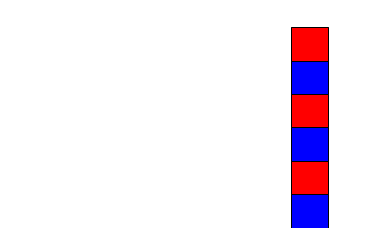

In [7]:
w.draw()

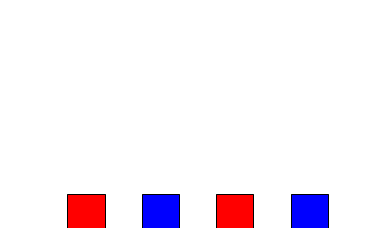

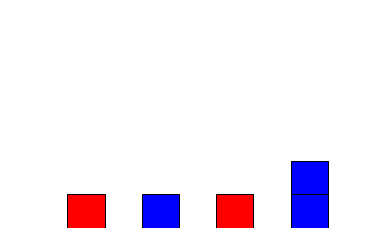

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks
(0.5, 0.5)
R: Is the top object red?
T: no


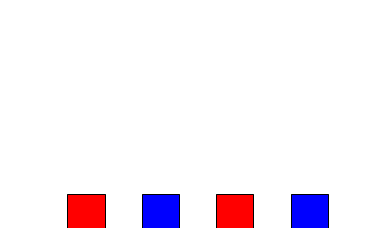

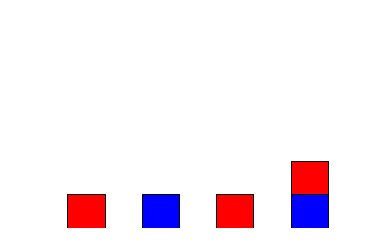

0.592843080325518 0.8702210625642086
0.6812557243542651


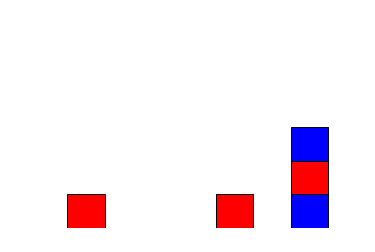

0.2620045302970568 0.5895419417510559
0.4444205097924866


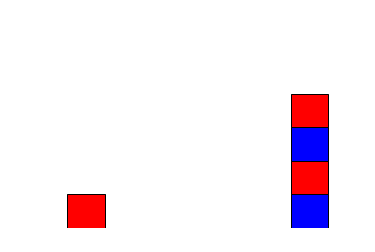

0.5993313054610949 0.874104353903452
0.6856518936036478


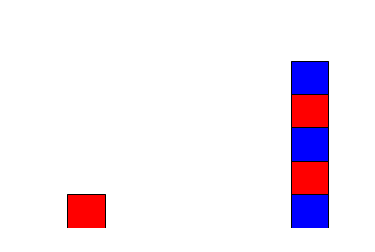

0.2599529041516119 0.5873023178887936
0.4426219618646802


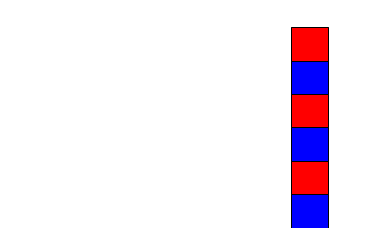

0.5996972864018906 0.8742824486994405
0.6859308308132966
DONE


In [2]:
w.draw()
while not w.test_success():

    plan = agent.plan()
    for a, args in plan:
        if a == 'reach-goal':
            break
        w.update(a, args)
        w.draw()
        correction = agent.teacher.correction(w)
        if correction:
            print("T:", correction)
            agent.get_correction(correction, a, args)
            w.draw()
            break
        else:
            agent.no_correction(a, args)
            
print('DONE')    

In [5]:
plan

[('put', ['b5', 'b4']),
 ('put', ['b2', 'b5']),
 ('put', ['b3', 'b2']),
 ('put', ['b6', 'b3']),
 ('put', ['b1', 'b6']),
 ('reach-goal', [])]